In [14]:
from transformers import BertForMaskedLM, BertConfig,BertTokenizer, BertForPreTraining, BertForSequenceClassification, AutoModel
import torch
from datasets import load_dataset, load_metric
from torch.utils.data import DataLoader, SequentialSampler
from tqdm import tqdm
from typing import List,Union,Dict
import torch.nn.functional as F
import numpy as np
import transformers
from torch import Tensor
import matplotlib.pyplot as pl
import seaborn as sns

In [15]:
sns.set_style('darkgrid')

In [3]:
from input_marginalization import calculate_input_marginalisation

In [4]:
dataset = load_dataset('glue', 'sst2', split = 'validation')

Reusing dataset glue (C:\Users\iamab\.cache\huggingface\datasets\glue\sst2\1.0.0\dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


In [5]:
dataset.features['label']

ClassLabel(num_classes=2, names=['negative', 'positive'], names_file=None, id=None)

In [6]:
def give_sent_label_pair(index):
    print(dataset[index]['sentence'])
    print(dataset[index]['label'])

    return dataset[index]['sentence'],dataset[index]['label']

In [7]:
sent,label = give_sent_label_pair(1)

unflinchingly bleak and desperate 
0


In [8]:
target_model = BertForSequenceClassification.from_pretrained('textattack/bert-base-uncased-SST-2')

In [9]:
language_model = BertForMaskedLM.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [10]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [11]:
attribution_scores, marinalised_probs = calculate_input_marginalisation(target_model, language_model, sent, tokenizer, label)

calculating target class probs for index 9: 100%|████████████████████████████████████| 342/342 [00:08<00:00, 38.02it/s]


In [12]:
attribution_scores

{'[CLS]': -0.1743878299905326,
 'unflinchingly': 4.321102052523051,
 'bleak': 7.044154536846676,
 'and': 1.3517100341011483,
 'desperate': 0.2528024051361477,
 '[SEP]': 8.374740626325515}

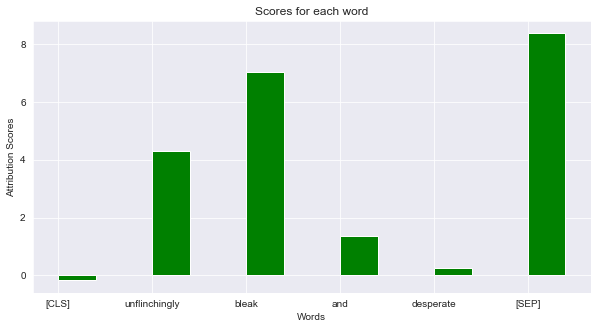

In [21]:
# import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
words = list(attribution_scores.keys())
scores = list(attribution_scores.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(words,scores, color ='green',
        width = 0.4, align = 'edge')
 
plt.xlabel("Words")
plt.ylabel("Attribution Scores")
plt.title("Scores for each word")
plt.show()